In [1]:
# Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
% matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv('../Data/trip_diary.csv', index_col=0)
df.head()

,PLSAM,SAMPN,PERNO,PLANO,OTAZ,OTRACT,DTAZ,DTRACT,LTMODE_AGG,TRPDIST_HN,...,WTAZ,WTRACT,STUDE,SCHOL,STAZ,STRACT,PTRIPS_V,PTRIPS_T,PTRIPS_NM,PTRIPS_O
0,30000560102,3000056,1,2,2626,9001205100,2627,9001205200,1.0,2.81,...,2627,9.00E+09,No,NaN,NaN,NaN,6,0,0,0
1,30000560103,3000056,1,3,2627,9001205200,2626,9001205100,1.0,2.81,...,2627,9.00E+09,No,NaN,NaN,NaN,6,0,0,0
2,30000560104,3000056,1,4,2626,9001205100,2627,9001205200,1.0,2.81,...,2627,9.00E+09,No,NaN,NaN,NaN,6,0,0,0
3,30000560105,3000056,1,5,2627,9001205200,2626,9001205100,2.1,2.81,...,2627,9.00E+09,No,NaN,NaN,NaN,6,0,0,0
4,30000560106,3000056,1,6,2626,9001205100,2628,9001205300,2.1,3.47,...,2627,9.00E+09,No,NaN,NaN,NaN,6,0,0,0


In [3]:
# Print Columns
df.columns

Index([u'PLSAM', u'SAMPN', u'PERNO', u'PLANO', u'OTAZ', u'OTRACT', u'DTAZ',
       u'DTRACT', u'LTMODE_AGG', u'TRPDIST_HN', u'TRPDUR', u'TRP_DEP_HR',
       u'TRP_DEP_MIN', u'TRP_ARR_HR', u'TRP_ARR_MIN', u'TOUR_PURP', u'HHSIZ',
       u'INCOM', u'HHVEH', u'HHCHD', u'RESTY', u'GENDER', u'AGE_R', u'RACE',
       u'EMPLY', u'WORKS', u'WDAYS', u'INDUS', u'OCCUP', u'WTAZ', u'WTRACT',
       u'STUDE', u'SCHOL', u'STAZ', u'STRACT', u'PTRIPS_V', u'PTRIPS_T',
       u'PTRIPS_NM', u'PTRIPS_O'],
      dtype='object')

In [4]:
# Select columns for decision tree
data = df[[u'LTMODE_AGG', u'TRPDIST_HN', u'TRPDUR', u'TRP_DEP_HR',
       u'TRP_DEP_MIN', u'TRP_ARR_HR', u'TRP_ARR_MIN', u'TOUR_PURP', u'HHSIZ',
       u'INCOM', u'HHVEH', u'HHCHD', u'RESTY', u'GENDER', u'AGE_R', u'RACE',
       u'EMPLY', u'WORKS', u'WDAYS', u'INDUS', u'OCCUP', u'STUDE', u'SCHOL']]

In [5]:
data['LTMODE_AGG'].unique()

array([  1. ,   2.1,   2.2,   9. ,   3. ,   8.1,   7.1,   5. ,   5.1,
         6. ,   6.1,   6.2,   4. ,  10. ,   7. ,   7.2,   8.2,   3.1,
        11. ,   4.1,   4.2,   5.2,   3.2])

In [6]:
# Aggregate LTMODE_AGG together
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace([1., 2.1, 2.2, 10], 'Vehicle')
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace([3., 3.1, 3.2, 4., 4.1, 4.2, 5., 5.1, 5.2, 9.], 'Bus')
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace([6., 6.1, 6.2], 'Subway')
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace([7., 7.1, 7.2], 'Rail')
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace(8.1, 'Walk')
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace(8.2, 'Bike')
data['LTMODE_AGG'] = data['LTMODE_AGG'].replace(11., 'Other')
data['LTMODE_AGG'].unique()

/Users/Danny1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Danny1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Danny1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

array(['Vehicle', 'Bus', 'Walk', 'Rail', 'Subway', 'Bike', 'Other'], dtype=object)

In [7]:
# Check columns with n/a values
data.isnull().any()

LTMODE_AGG     False
TRPDIST_HN     False
TRPDUR         False
TRP_DEP_HR     False
TRP_DEP_MIN    False
TRP_ARR_HR     False
TRP_ARR_MIN    False
TOUR_PURP      False
HHSIZ          False
INCOM          False
HHVEH          False
HHCHD          False
RESTY          False
GENDER         False
AGE_R          False
RACE           False
EMPLY           True
WORKS           True
WDAYS           True
INDUS           True
OCCUP           True
STUDE          False
SCHOL           True
dtype: bool

In [8]:
# Prepare Dataset
data = data.fillna('Not Applicable')
data.head()

,LTMODE_AGG,TRPDIST_HN,TRPDUR,TRP_DEP_HR,TRP_DEP_MIN,TRP_ARR_HR,TRP_ARR_MIN,TOUR_PURP,HHSIZ,INCOM,...,GENDER,AGE_R,RACE,EMPLY,WORKS,WDAYS,INDUS,OCCUP,STUDE,SCHOL
0,Vehicle,2.81,7,7,29,7,36,9,6,5,...,Female,35-54 years,White,Yes,Works,Five,EDUCATIONAL SERVICES,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,No,Not Applicable
1,Vehicle,2.81,7,8,35,8,42,9,6,5,...,Female,35-54 years,White,Yes,Works,Five,EDUCATIONAL SERVICES,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,No,Not Applicable
2,Vehicle,2.81,8,12,37,12,45,1,6,5,...,Female,35-54 years,White,Yes,Works,Five,EDUCATIONAL SERVICES,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,No,Not Applicable
3,Vehicle,2.81,7,15,17,15,24,1,6,5,...,Female,35-54 years,White,Yes,Works,Five,EDUCATIONAL SERVICES,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,No,Not Applicable
4,Vehicle,3.47,9,18,20,18,29,9,6,5,...,Female,35-54 years,White,Yes,Works,Five,EDUCATIONAL SERVICES,OFFICE AND ADMINISTRATIVE SUPPORT OCCUPATIONS,No,Not Applicable


In [9]:
# Select target variable and feature space
Y = data.loc[:, 'LTMODE_AGG']
X = pd.get_dummies(data.iloc[:, 1:124])

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=999)

In [10]:
X.columns

Index([u'TRPDIST_HN', u'TRPDUR', u'TRP_DEP_HR', u'TRP_DEP_MIN', u'TRP_ARR_HR',
       u'TRP_ARR_MIN', u'TOUR_PURP', u'HHSIZ', u'INCOM', u'HHVEH',
       ...
       u'SCHOL_DK', u'SCHOL_Daycare', u'SCHOL_Grade 9 to 12',
       u'SCHOL_Graduate School/Professional', u'SCHOL_Kindergarten to Grade 8',
       u'SCHOL_Not Applicable', u'SCHOL_Nursery/Pre-school',
       u'SCHOL_Other (Specify)', u'SCHOL_RF',
       u'SCHOL_Vocational/Technical School'],
      dtype='object', length=119)

In [11]:
dtc = DTC()
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
rs(pd.get_dummies(y_test), pd.get_dummies(pred))

0.75373328764947289

In [12]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dtc.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
Feature_importance.sort_values(by="importance",ascending=False).iloc[:15,:]

,variables,importance
0,TRPDIST_HN,0.186637
9,HHVEH,0.186052
1,TRPDUR,0.166236
6,TOUR_PURP,0.044867
8,INCOM,0.037062
5,TRP_ARR_MIN,0.0352615
3,TRP_DEP_MIN,0.031097
4,TRP_ARR_HR,0.0283049
2,TRP_DEP_HR,0.0259684
105,STUDE_Yes - Full Time,0.0259531


In [15]:
AUC_depth = []
for i in range(1,25,1):
    AUC_temp = []
    dtc = DTC(max_depth=i, random_state=999)
    dtc.fit(X_train, y_train)
    pred=dtc.predict(X_test)
    AUC_depth.append(rs(pd.get_dummies(y_test), pd.get_dummies(pred)))

(1, 25)

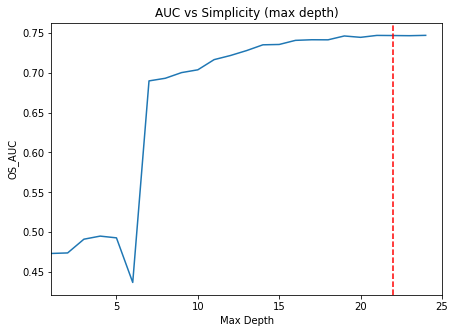

In [16]:
plt.figure(figsize=(7,5))
plt.plot(range(1,25,1), AUC_depth)
plt.xlabel("Max Depth")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max depth)")
plt.axvline(22,color='r',linestyle='--')
plt.xlim(1,25)

In [18]:
AUC_leaf = []
for i in range(2,100,3):
    AUC_temp = []
    dtc = DTC(max_leaf_nodes=i, random_state=999)
    dtc.fit(X_train, y_train)
    pred=dtc.predict(X_test)
    AUC_leaf.append(rs(pd.get_dummies(y_test), pd.get_dummies(pred)))

(1, 100)

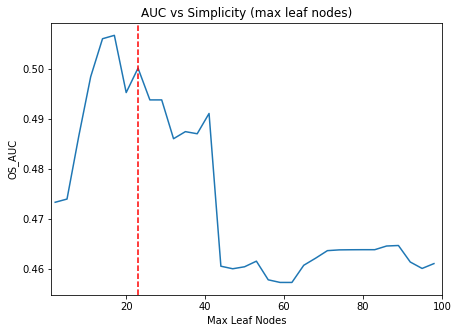

In [19]:
plt.figure(figsize=(7,5))
plt.plot(range(2,100,3), AUC_leaf)
plt.xlabel("Max Leaf Nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.axvline(23,color='r',linestyle='--')
plt.xlim(1,100)

In [66]:
# Select target variable and feature space
data_simple = data[[u'LTMODE_AGG', u'TRPDIST_HN', u'TRPDUR', u'TOUR_PURP', u'HHVEH', 'INCOM']]
Y = data_simple.loc[:, 'LTMODE_AGG']
X = pd.get_dummies(data_simple.iloc[:, 1:5])

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=999)

In [68]:
data_simple.columns

Index([u'LTMODE_AGG', u'TRPDIST_HN', u'TRPDUR', u'TOUR_PURP', u'HHVEH',
       u'INCOM'],
      dtype='object')

In [99]:
dtc = DTC(max_leaf_nodes=12, random_state=999)
dtc.fit(X_train,y_train)
pred = pd.get_dummies(dtc.predict(X_test))
real = pd.get_dummies(y_test)
rs(real, pred)

0.50578105562346398

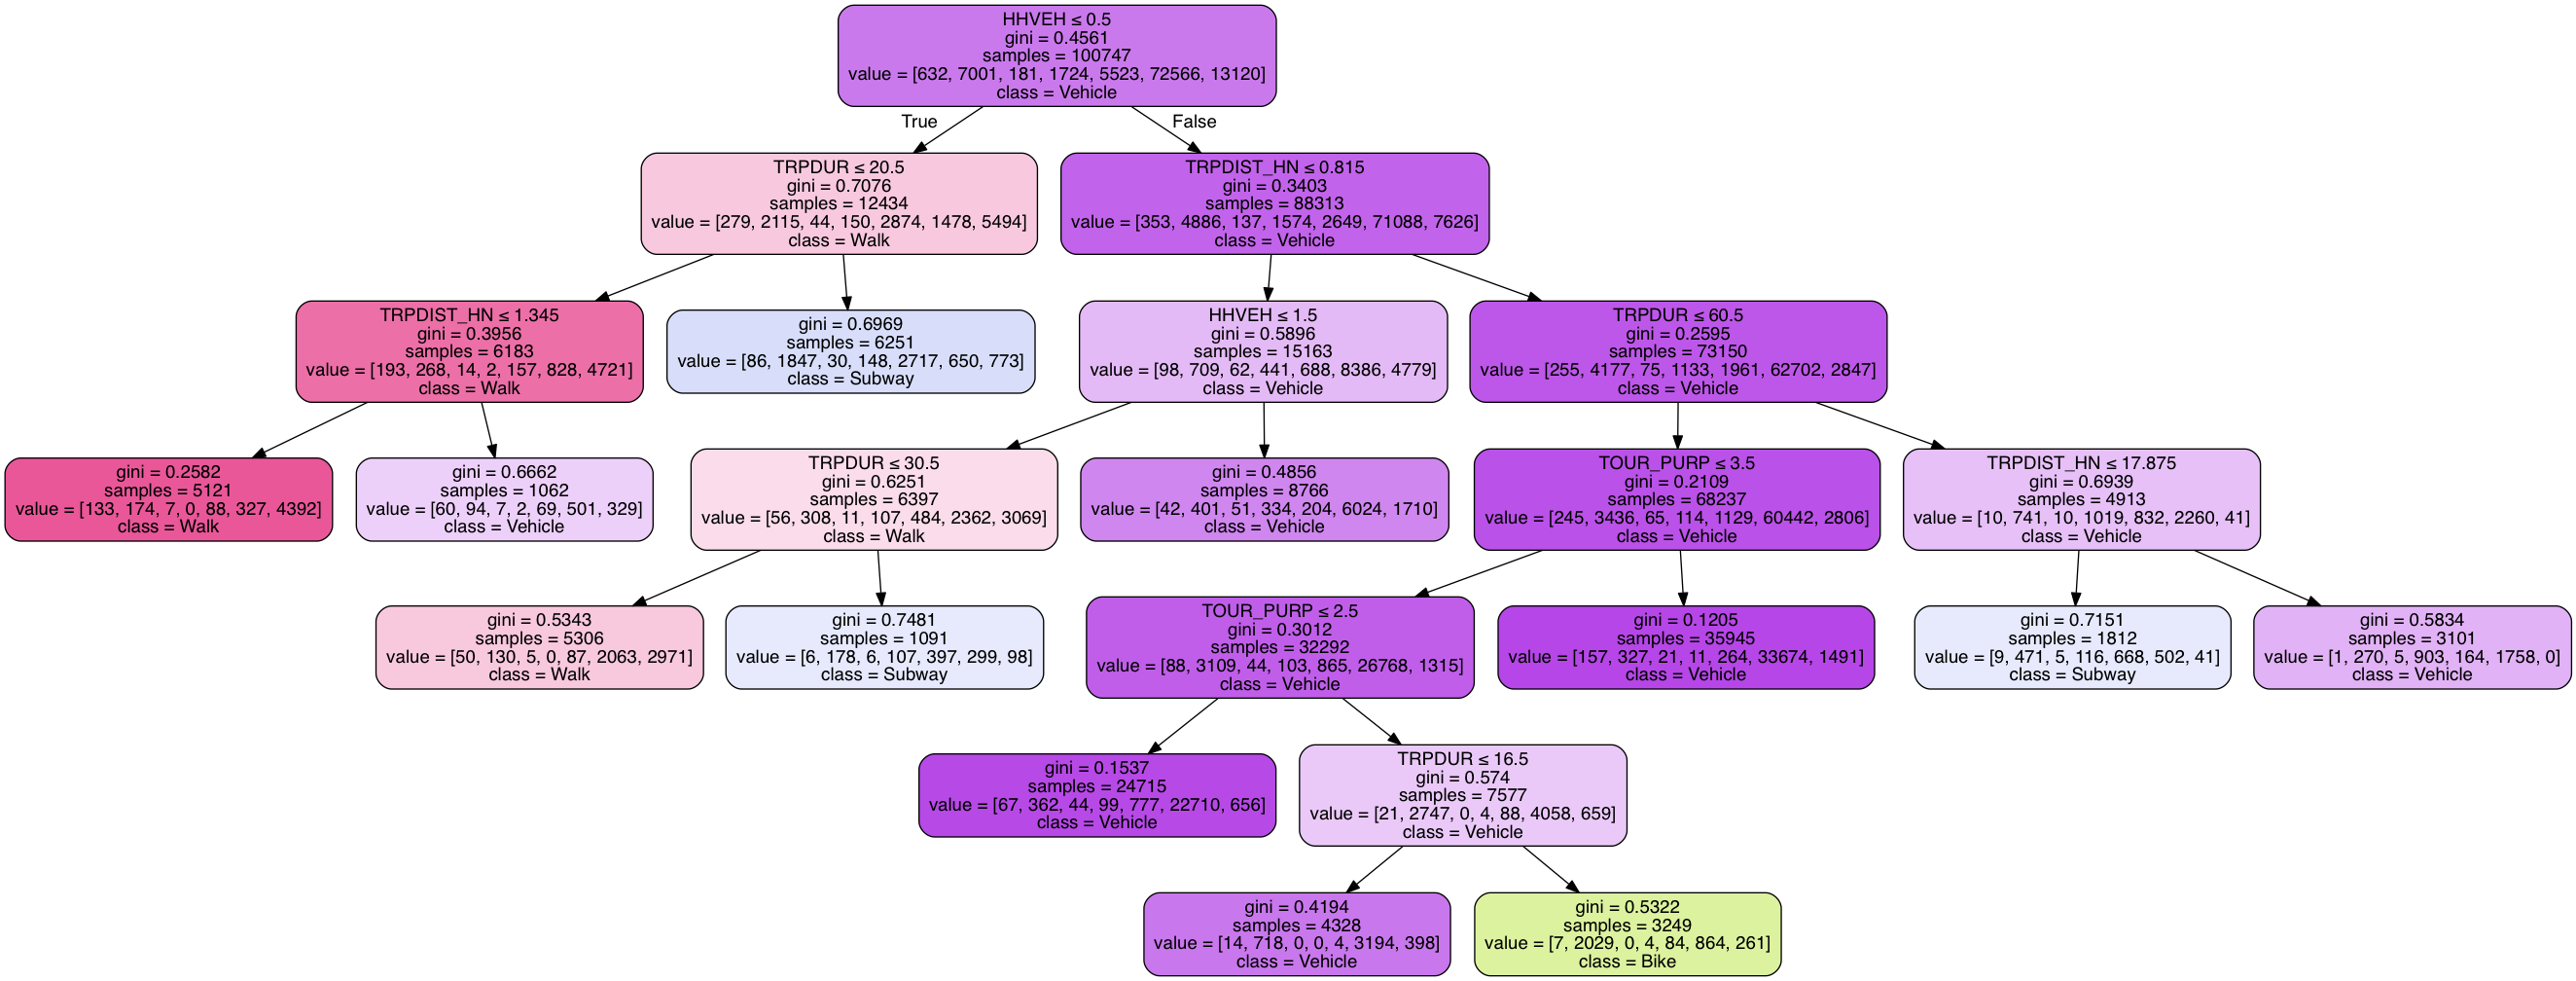

In [100]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data,  
                         feature_names= X.columns,
                         class_names= ['Bus', 'Bike', 'Other', 'Rail', 'Subway', 'Vehicle', 'Walk'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 